#       CEFET-RJ - UNED Nova Iguaçu
##   Dep. Engenharia de Controle e Automação 
## Disciplina: Processamento Digital de Imagens
Professor: Gabriel Matos Araujo<br>
Material de Aula (Conversão em Python)<br>
Script escrito por Pedro Monforte

####          Original File Heading
 EE368/CS232 Digital Image Processing<br>
 Bernd Girod<br>
 Department of Electrical Engineering, Stanford University <br>

 Script by Qiyuan Tian and David Chen<br>
 Color: visible range of the electromagnetic spectrum <br>

 visibleSpectrum.csv:  CIE 1931 color matching functions<br>
 2-degree, XYZ CMFs, at 1nm resolution, limit to [380nm, 760nm]<br>
 Reference: http://cvrl.ioo.ucl.ac.uk/cmfs.htm

In [1]:
import numpy as np
from numpy import genfromtxt as load
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

After downloading the visibleSpectrum.csv file in the referenced site we can load it in XYZ

In [2]:
CMFs = load('visibleSpectrum.csv', delimiter=',')
wavelength = np.copy(CMFs[:,0])
xyz = (CMFs[:, 1:4]).astype(np.float32)

Convert it to RGB using OpenCV 

In [3]:
xyz = np.transpose(np.expand_dims(xyz, axis=2),(2, 0, 1))
rgb = cv2.cvtColor(xyz,cv2.COLOR_XYZ2RGB)
rgb = np.tile(rgb,[50,1,1])

In [4]:
for i in range(3): #Normalize to 0~1 range
    rgb[:,:,i] = (rgb[:,:,i] - np.min(rgb[:,:,i]))
    rgb[:,:,i] = rgb[:,:,i]/np.max(rgb[:,:,i])

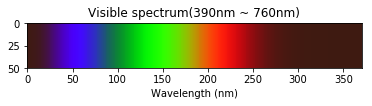

In [5]:
plt.imshow(rgb)
plt.title('Visible spectrum(390nm ~ 760nm)');
plt.xlabel('Wavelength (nm)');
rgb = cv2.cvtColor(rgb,cv2.COLOR_RGB2BGR)
cv2.imwrite('Visible_Spectrum_colorspectrum2.png',rgb*255);